## H2O-3による、Anomaly Detectionチュートリアル

参考
- Blog: [Anomaly Detection with Isolation Forests using H2O](https://www.h2o.ai/blog/anomaly-detection-with-isolation-forests-using-h2o/)
- Notebook sample: [Anomaly Detection](https://github.com/h2oai/h2o-tutorials/blob/master/best-practices/anomaly-detection/anomaly_detection.ipynb)

In [1]:
import h2o
print(h2o.__version__)

3.30.0.1


In [5]:
h2o.init(url='http://18.212.106.62:54321')

Checking whether there is an H2O instance running at http://18.212.106.62:54321 . connected.


H2O_cluster_uptime:,15 mins 01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,"1 year, 1 month and 16 days !!!"
H2O_cluster_name:,Puddle
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,49.74 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


### データ

In [9]:
df = h2o.import_file("/data/my_sample/creditcard.csv")
df.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(284807, 31)

In [10]:
type(df)

h2o.frame.H2OFrame

[H2OFrame](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html#h2oframe)

In [11]:
df.head()

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


利用データ: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

特徴量
- Time : Seconds elapsed between each transaction
- V1~V28 : Principal components obtained with PCA (秘匿情報にPCAを実施したもの)
- Amount : Transaction Amount

ターゲット
- Class : 1:Fraud, 0:Not Fraud

284,807のトランザクション中、492件のみがFraud（0.17%）の不均衡データ

In [45]:
feature_names = df.col_names[:30]   # 特徴量名

In [40]:
df.describe()

Rows:284807
Cols:31




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508067,1.2262548514636384e-15,3.5446429300120796e-16,-1.328442755752275e-15,2.030984597736651e-15,1.0985199711028427e-15,1.500884844239349e-15,-5.875804496596601e-16,7.66409282164774e-17,-2.324774822566481e-15,2.213006802250785e-15,1.5328185643295479e-15,-1.2134813634275587e-15,9.037242785526292e-16,1.2214647934501085e-15,4.9561133579988715e-15,1.4465975200860108e-15,-3.704311530463074e-16,1.0154922988683254e-15,1.0490227049630343e-15,6.386744018039783e-16,1.532818564329548e-16,-3.4488417697414826e-16,2.5227638871257145e-16,4.469124126623338e-15,5.364864975153418e-16,1.6908904787760325e-15,-3.6434378765411323e-16,-1.241423368506483e-16,88.34961925093133,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.14595456615,1.958695803857486,1.6513085794769975,1.5162550051777715,1.4158685749409203,1.3802467340314393,1.3322710897575754,1.237093598182666,1.1943529026692037,1.098632089224319,1.088849765402517,1.0207130277115584,0.9992013895301448,0.9952742301251534,0.958595611257064,0.9153160116104392,0.8762528873883701,0.8493370636743892,0.8381762095288414,0.8140405007685786,0.7709250248871169,0.7345240143713132,0.7257015604409116,0.6244602955949902,0.6056470678271602,0.5212780705409424,0.48222701326105727,0.4036324949650307,0.3300832641602509,250.12010924018855,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459

In [23]:
df.isna().any()

# 欠損なし

False

In [33]:
# Fraudの数
df['Class'].sum()

492.0

In [42]:
# Fraudの割合
df['Class'].sum() / df.nrows

0.001727485630620034

### Autoencoder

Python API: [H2OAutoEncoderEstimator](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoencoderestimator)

In [67]:
from h2o.estimators import H2OAutoEncoderEstimator

In [68]:
mod_ae = H2OAutoEncoderEstimator()

In [70]:
mod_ae.train(training_frame=df, x=feature_names)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [71]:
mod_ae

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1621462828359_3


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 52,430 weights/biases, 626.6 KB, 999,675 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,1.00422,1.09713e-154,0,-0.000363789,0.0954466,0.5,1.09713e-154
2,,3,200,Rectifier,0,0,0,1.00422,1.09713e-154,0,-0.00020149,0.0694005,1,1.09713e-154
3,,4,30,Rectifier,,0,0,1.00422,1.09713e-154,0,-0.00275567,0.0956866,0,1.09713e-154




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.5878961537750818
RMSE: 0.7667438645174031

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2021-05-19 23:52:26,0.595 sec,0.00000 obs/sec,0.000000,0,0.0,0.766744,5.878962e-01
1,,2021-05-19 23:52:36,10.769 sec,9876 obs/sec,0.350146,1,99724.0,15734.249177,2.475666e+08
2,,2021-05-19 23:52:48,21.831 sec,9479 obs/sec,0.702149,2,199977.0,6.505019,4.231528e+01
3,,2021-05-19 23:52:59,32.897 sec,9340 obs/sec,1.052611,3,299791.0,35074.321680,1.230208e+09
4,,2021-05-19 23:53:10,43.806 sec,9308 obs/sec,1.403329,4,399678.0,69954.654364,4.893654e+09
5,,2021-05-19 23:53:21,54.862 sec,9260 obs/sec,1.753524,5,499416.0,196.115270,3.846120e+04
6,,2021-05-19 23:53:32,1 min 6.548 sec,9171 obs/sec,2.104629,6,599413.0,561219.386180,3.149672e+11
7,,2021-05-19 23:53:44,1 min 18.697 sec,9031 obs/sec,2.455705,7,699402.0,29314.601780,8.593459e+08
8,,2021-05-19 23:53:56,1 min 29.796 sec,9036 obs/sec,2.807178,8,799504.0,902743.224682,8.149453e+11
9,,2021-05-19 23:54:07,1 min 41.047 sec,9028 obs/sec,3.159497,9,899847.0,61439.199835,3.774775e+09



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V3,1.000000,1.000000,0.037225
1,V11,0.961053,0.961053,0.035775
2,V18,0.936676,0.936676,0.034867
3,V10,0.934715,0.934715,0.034794
4,V28,0.931637,0.931637,0.034680
5,Amount,0.922005,0.922005,0.034321
6,V2,0.919577,0.919577,0.034231
7,V22,0.914482,0.914482,0.034041
8,V4,0.907486,0.907486,0.033781
9,V7,0.903623,0.903623,0.033637



See the whole table with table.as_data_frame()


In [76]:
mod_ae.predict(df).head(5)

# predictを実行すると、出力層からのアウトプット（入力値の再現）となる

deeplearning prediction progress: |███████████████████████████████████████| 100%


reconstr_Time,reconstr_V1,reconstr_V2,reconstr_V3,reconstr_V4,reconstr_V5,reconstr_V6,reconstr_V7,reconstr_V8,reconstr_V9,reconstr_V10,reconstr_V11,reconstr_V12,reconstr_V13,reconstr_V14,reconstr_V15,reconstr_V16,reconstr_V17,reconstr_V18,reconstr_V19,reconstr_V20,reconstr_V21,reconstr_V22,reconstr_V23,reconstr_V24,reconstr_V25,reconstr_V26,reconstr_V27,reconstr_V28,reconstr_Amount
94813.9,66.0325,3.54464e-16,-1.32844e-15,2.03098e-15,259.688,52.4954,-5.8758e-16,7.66409e-17,38.8087,2.21301e-15,1.53282e-15,-1.21348e-15,22.0417,1.22146e-15,4.95611e-15,1.4466e-15,-3.70431e-16,1.01549e-15,1.04902e-15,6.38674e-16,115.286,-3.44884e-16,2.52276e-16,4.46912e-15,35.7331,1.69089e-15,-3.64344e-16,-1.24142e-16,88.3496
94813.9,64.3635,3.54464e-16,-1.32844e-15,2.03098e-15,263.164,52.9585,-5.8758e-16,7.66409e-17,39.497,2.21301e-15,1.53282e-15,-1.21348e-15,21.6985,1.22146e-15,4.95611e-15,1.4466e-15,-3.70431e-16,1.01549e-15,1.04902e-15,6.38674e-16,114.489,-3.44884e-16,2.52276e-16,4.46912e-15,35.5606,1.69089e-15,-3.64344e-16,-1.24142e-16,88.3496
94813.9,67.6408,3.54464e-16,-1.32844e-15,2.03098e-15,258.224,53.3973,-5.8758e-16,7.66409e-17,37.788,2.21301e-15,1.53282e-15,-1.21348e-15,21.8027,1.22146e-15,4.95611e-15,1.4466e-15,-3.70431e-16,1.01549e-15,1.04902e-15,6.38674e-16,110.73,-3.44884e-16,2.52276e-16,4.46912e-15,36.0455,1.69089e-15,-3.64344e-16,-1.24142e-16,88.3496
94813.9,63.541,3.54464e-16,-1.32844e-15,2.03098e-15,268.317,50.0374,-5.8758e-16,7.66409e-17,39.3995,2.21301e-15,1.53282e-15,-1.21348e-15,21.7165,1.22146e-15,4.95611e-15,1.4466e-15,-3.70431e-16,1.01549e-15,1.04902e-15,6.38674e-16,115.597,-3.44884e-16,2.52276e-16,4.46912e-15,35.4005,1.69089e-15,-3.64344e-16,-1.24142e-16,88.3496
94813.9,62.4847,3.54464e-16,-1.32844e-15,2.03098e-15,263.151,51.85,-5.8758e-16,7.66409e-17,39.3691,2.21301e-15,1.53282e-15,-1.21348e-15,21.8123,1.22146e-15,4.95611e-15,1.4466e-15,-3.70431e-16,1.01549e-15,1.04902e-15,6.38674e-16,114.646,-3.44884e-16,2.52276e-16,4.46912e-15,35.3851,1.69089e-15,-3.64344e-16,-1.24142e-16,88.3496


In [78]:
# 異常値スコア（MSE）の取得
score_ae = mod_ae.anomaly(df)

In [79]:
score_ae

Reconstruction.MSE
0.578458
0.560976
0.563358
0.567335
0.552945
0.577292
0.568567
0.549809
0.576287
0.564178


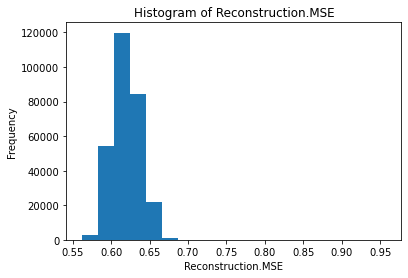

In [81]:
score_ae.hist()

In [82]:
score_ae.quantile()

Probs,Reconstruction.MSEQuantiles
0.01,0.551475
0.1,0.565551
0.25,0.574747
0.333,0.578847
0.5,0.586753
0.667,0.595466
0.75,0.600317
0.9,0.611827
0.99,0.629848
